In [ ]:
# Make sure we've got the latest version of fastai:
# !pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

In [40]:
from fastai import *

In [51]:
path = Path('faces')


In [52]:
fns = get_image_files(path)

In [53]:
fns

(#277) [Path('faces/others/0.jpg'),Path('faces/others/001.jpg'),Path('faces/others/002.jpg'),Path('faces/others/1.jpg'),Path('faces/others/10.jpg'),Path('faces/others/100.jpg'),Path('faces/others/101.jpg'),Path('faces/others/102.jpg'),Path('faces/others/103.jpg'),Path('faces/others/104.jpg'),Path('faces/others/105.jpg'),Path('faces/others/106.jpg'),Path('faces/others/107.jpg'),Path('faces/others/108.jpg'),Path('faces/others/109.jpg'),Path('faces/others/11.jpg'),Path('faces/others/110.jpg'),Path('faces/others/111.jpg'),Path('faces/others/112.jpg'),Path('faces/others/113.jpg')...]

In [54]:
faces = DataBlock(
     blocks = (ImageBlock, CategoryBlock),
     get_items = get_image_files,
     splitter = RandomSplitter(valid_pct=0.2, seed=42),
     get_y = parent_label,
     item_tfms = Resize(128)  ## by default it crops
)


In [55]:
dls = faces.dataloaders(path)

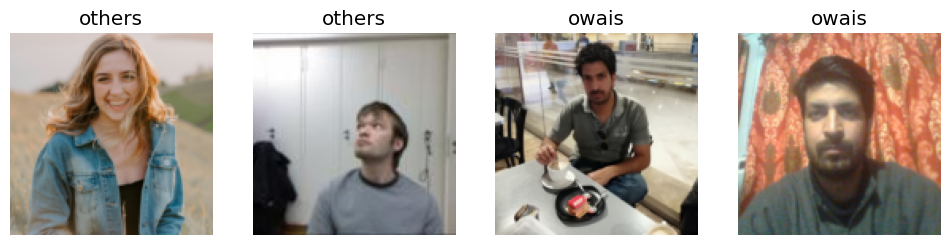

In [56]:
## by defaullt it crop and will give the model batches of 64 for training and testing
## to view
dls.valid.show_batch(max_n=4, nrows=1)

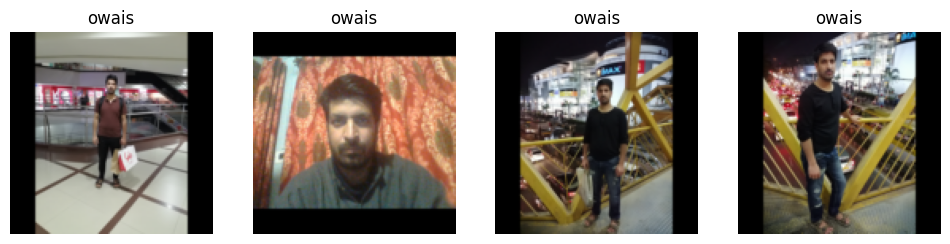

In [9]:
## instead of cropping
## we can pad the images
faces = faces.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = faces.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

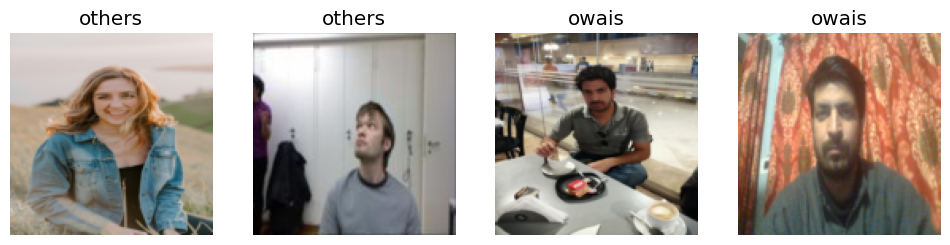

In [57]:
## or we can squish them

faces = faces.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = faces.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

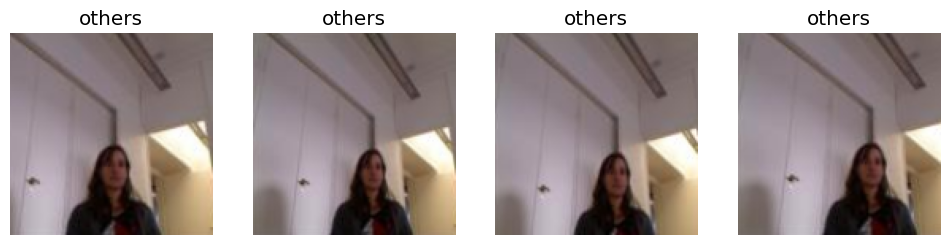

In [62]:
# random cropping on training data
faces = faces.new(item_tfms=RandomResizedCrop(128, min_scale=0.5))
dls = faces.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

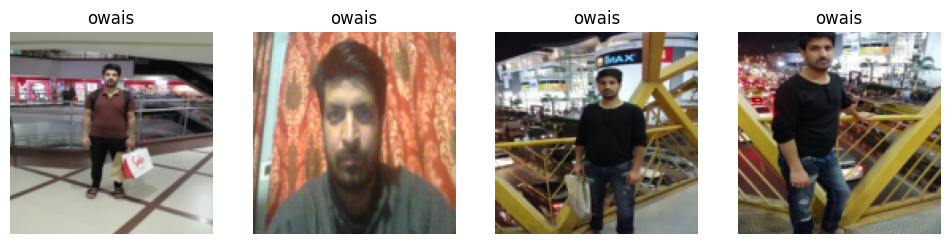

In [11]:
## random cropping of an image is considered better
faces = faces.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = faces.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
## data augmentation: rotation, flipping, perspective warping, contrast and brightness changes
## via GPU intensive batch_transforms

faces = faces.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = faces.dataloaders(path)
dls.train.show_batch(max_n=16, nrows=4, unique=True)


In [58]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.213956,0.303529,0.090909,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.399973,0.172422,0.054545,00:48
1,0.284510,0.136922,0.018182,00:49
2,0.215286,0.139690,0.018182,00:45
3,0.162627,0.114883,0.018182,00:44
4,0.128448,0.089895,0.018182,00:45


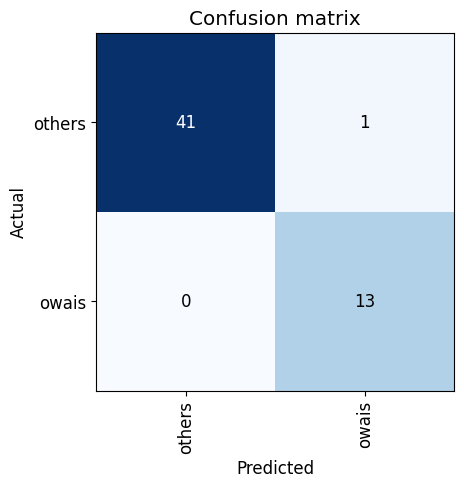

In [59]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

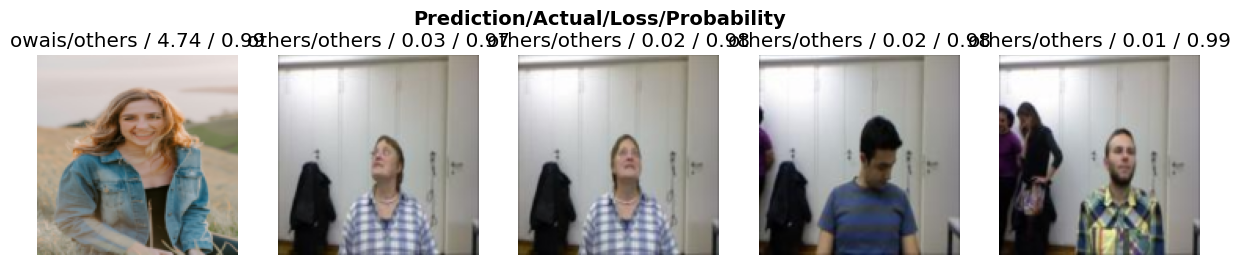

In [60]:
## plot_top_losses shows us the images with the highest loss in our dataset

interp.plot_top_losses(5, nrows=1)


In [64]:
from fastai.vision.widgets import *

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner 

In [61]:
## will save a export file called export.pkl to save the model

learn.export()
